<a href="https://colab.research.google.com/github/tanishayadav16/DL_exp3/blob/main/exp15(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Check the column names to ensure 'Miles_Travelled' exists
print(df.columns)

# Display the first few rows of the dataset
print(df.head())


Index(['year', 'county_id', 'county_name', 'total', 'dvmt_millions',
       'per_capita', 'per_vehicle'],
      dtype='object')
   year  county_id county_name       total  dvmt_millions  per_capita  \
0  2000      42017       Bucks  12926800.0          12.93       21.63   
1  2000      34005  Burlington  12170867.0          12.17       28.75   
2  2000      34007      Camden  10684022.0          10.68       20.99   
3  2000      42029     Chester  10920800.0          10.92       25.19   
4  2000      42045    Delaware   9321600.0           9.32       16.92   

   per_vehicle  
0        31.49  
1        43.60  
2        36.91  
3        36.90  
4        28.84  


   year  county_id county_name       total  dvmt_millions  per_capita  \
0  2000      42017       Bucks  12926800.0          12.93       21.63   
1  2000      34005  Burlington  12170867.0          12.17       28.75   
2  2000      34007      Camden  10684022.0          10.68       20.99   
3  2000      42029     Chester  10920800.0          10.92       25.19   
4  2000      42045    Delaware   9321600.0           9.32       16.92   

   per_vehicle  
0        31.49  
1        43.60  
2        36.91  
3        36.90  
4        28.84  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 186ms/step - loss: nan - val_loss: nan
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: nan - val_loss: nan
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: nan - val_loss: nan
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: nan - val_loss: nan
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: nan - val_loss: nan
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: nan - val_loss: nan
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: nan - val_loss: nan
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: nan - val_loss: nan
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: nan - val_loss: nan
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: nan - val_loss: nan
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: nan - val_loss: nan
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: nan - val_loss: nan
Epoch 13/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: nan - val_loss

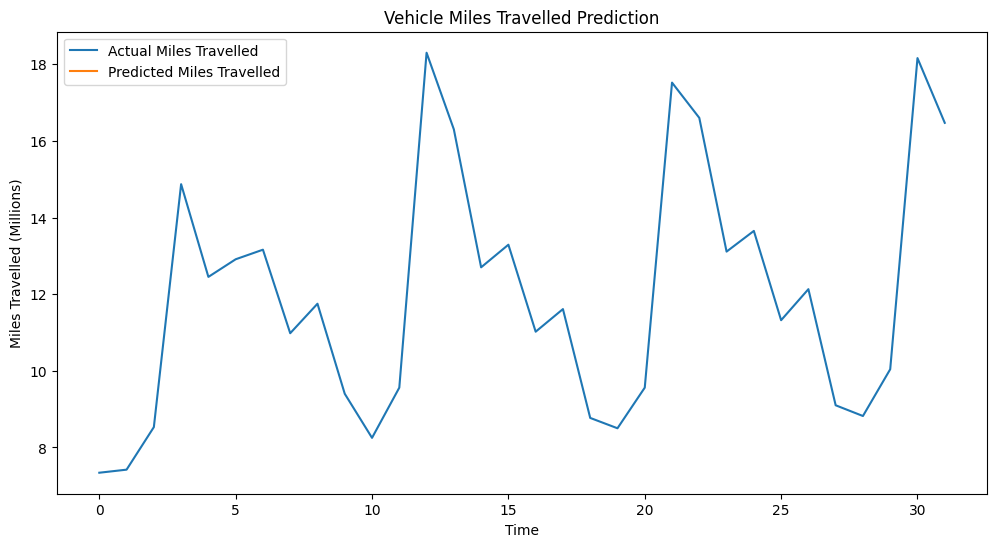

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('vehicle_mileage_data.csv')

# Display the first few rows of the dataset
print(df.head())

# We are going to predict 'dvmt_millions' (miles travelled)
# Normalize the 'dvmt_millions' column
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['dvmt_millions']])

# Create sequences of 60 data points (representing 60 previous time steps)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Use last 60 time steps to predict the next step
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the RNN model
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(seq_length, 1)),
    Dense(1)  # Output layer to predict miles travelled
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test))

# Predict on the test data
predictions = model.predict(X_test)

# Rescale the predictions and actual values back to the original scale
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual Miles Travelled')
plt.plot(predictions_rescaled, label='Predicted Miles Travelled')
plt.title('Vehicle Miles Travelled Prediction')
plt.xlabel('Time')
plt.ylabel('Miles Travelled (Millions)')
plt.legend()
plt.show()
